# Testing

Notebook for developing and testing the package. 

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../uhecr_model/stan')

%matplotlib inline

from fancy import *

import stan_utility

In [2]:
# read in relevant data
source_file = '../../uhecr_model/data/agn_catalog.dat'

# add AGN data
data = Data()
data.add_source(source_file, 'AGN')

# get positions as unit vectors
varpi = data.source['AGN'].unit_vector

/Users/fran/projects/bayes/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


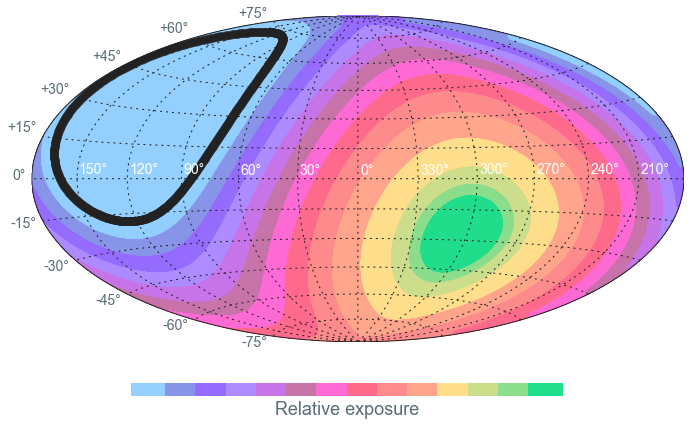

In [3]:
auger_coords = [-35.5, -69.3] # lat, lon in degrees
threshold_zenith_angle = 80 # degrees
data.add_detector(auger_coords, threshold_zenith_angle, label = 'Auger')

# plot the exposure (this can take ~15 s to run...)
data.detector['Auger'].show(view = 'map', cmap = 'vaporwave')